In [41]:
#导入需要的库
import pandana, matplotlib.pyplot as plt
from pandana.loaders import osm
%matplotlib inline
import pandas as pd
import pandana as pdna


In [42]:
import geopandas

In [43]:
# # 利用OSM的api获取指定区域内的POI信息
# bbox = [30.1398, 120.85,31.89, 122.20] #上海的经纬度范围
# amenity = 'school' #兴趣点种类
# pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags='"amenity"="{}"'.format(amenity))
# pois.to_csv("{}.csv".format(amenity),index=False, encoding='utf-8')

## 确定研究范围的边界（经济技术开发区3-4环）


In [44]:
# bbox = [30.43,113.8932,30.6231,114.3107]   #经开区研究范围的大致经纬度，GCj-02坐标系
# landuse = 'residential'  
# pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags='"landuse"="{}"'.format(landuse))
# pois.to_csv("{}.csv".format(landuse),index=False, encoding='utf-8')
"""
还是不要用这个获取兴趣点，这个poi不是很准确

"""

'\n还是不要用这个获取兴趣点，这个poi不是很准确\n\n'

## 根据给定的经纬度范围，利用OSM下载区域内路网


In [45]:
bbox = [30.43,113.8932,30.6231,114.3107] #经开区的bbox

In [ ]:
network_filename='./jingkaiqu_net.h5'#保存路网文件路径
network = pandana.loaders.osm.pdna_network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3])


D:\ANACONDA\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
D:\ANACONDA\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](30.43000000,113.89320000,30.62310000,114.31070000);>;);out;'}"


In [ ]:
# network = pandana.Network(network[0]["x"],network[0]["y"], network[1]["from"], network[1]["to"],network[1][["distance"]])
network=pandana.Network(nodes["x"], nodes["y"], edges["from"], edges["to"],
                 edges[["distance"]])

In [ ]:
#去除一些低连接度的节点，并保存路网文件
lcn = network.low_connectivity_nodes(impedance=1000, count=10, imp_name='distance')
network.save_hdf5('./jingkaiqu_net_low2.h5', rm_nodes=lcn)

### 导入路网和POI

In [ ]:
#导入路网
network = pandana.network.Network.from_hdf5("./jingkaiqu_net_low2.h5")
#对路网进行预计算，方便后面的查询
distance = 2000  #距离是指计算的距离范围，如2000代表查询范围路网节点中2000m以内
network.precompute(distance + 1)#预计算

In [65]:
import json
import ast

#### 导入poi

In [69]:
pois = pd.read_csv('./武汉市蔡甸区医院.csv')
pois.columns

Index(['Unnamed: 0', 'name', 'location', 'address', 'province', 'city', 'area',
       'street_id', 'telephone', 'detail', 'uid'],
      dtype='object')

In [70]:
df = pois
import ast
for i,v in df['location'].items(): #把str转换成dict
    v = ast.literal_eval(v)
    df['location'][i] = v
    
df['lat'] =pd.DataFrame(df.location.to_list())['lat']
df['lon'] =pd.DataFrame(df.location.to_list())['lng']
df

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,name,location,address,province,city,area,street_id,telephone,detail,uid,lat,lon
0,0,华中科技大学同济医学院附属协和医院西院,"{'lat': 30.498577, 'lng': 114.180748}",武汉市蔡甸区神龙大道58号,湖北省,武汉市,蔡甸区,87248d96d1f212aa2806ce0e,(027)84289562,1,87248d96d1f212aa2806ce0e,30.498577,114.180748
1,1,华中科技大学同济医院(中法新城院区),"{'lat': 30.555374, 'lng': 114.12036}",武汉市蔡甸区新天大道288号,湖北省,武汉市,蔡甸区,1221100d8154ff54100daab3,NaN,1,1221100d8154ff54100daab3,30.555374,114.120360
2,2,武汉后官湖医院,"{'lat': 30.47541, 'lng': 114.126717}",湖北省武汉市经济技术区后官湖大道152号(有轨电车T1路枫树三路站往东步行200米),湖北省,武汉市,蔡甸区,da90e78542c8ce1ad13ce38d,(027)84856120,1,da90e78542c8ce1ad13ce38d,30.475410,114.126717
3,3,常福医院,"{'lat': 30.439629, 'lng': 114.050148}",武汉市蔡甸区建新北路43号,湖北省,武汉市,蔡甸区,fc7675242013eee34e776e5f,NaN,1,fc7675242013eee34e776e5f,30.439629,114.050148
4,4,协和江北医院,"{'lat': 30.568141, 'lng': 114.050683}",湖北省武汉市蔡甸区成功大道111号,湖北省,武汉市,蔡甸区,edd51e64148fd654da2f28dd,"(027)84905996,(027)84906757",1,edd51e64148fd654da2f28dd,30.568141,114.050683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,侏儒山卫生院-住院部,"{'lat': 30.451687, 'lng': 113.848484}",武汉市蔡甸区侏健路侏儒山中心幼儿园东北侧约210米,湖北省,武汉市,蔡甸区,NaN,NaN,1,a31e53ebbeb1e09f04fef5e3,30.451687,113.848484
81,81,消泗乡卫生院-狂犬病暴露预防处置门诊,"{'lat': 30.322446, 'lng': 113.787205}",武汉市蔡甸区消泗正街消泗乡渔樵村625号,湖北省,武汉市,蔡甸区,NaN,(027)84063998,1,0c45a033e00a96b0b45f1e88,30.322446,113.787205
82,82,康婷美容养生会馆,"{'lat': 30.438654, 'lng': 114.048624}",湖北省武汉市蔡甸区南环西路21号,湖北省,武汉市,蔡甸区,6aac1e2258e81859ca09f0d5,NaN,1,6aac1e2258e81859ca09f0d5,30.438654,114.048624
83,83,蔡甸孙守则中医门诊部,"{'lat': 30.455592, 'lng': 114.022349}",武汉市蔡甸区车站南路武汉行鹏商务宾馆(奓山店)东侧约120米,湖北省,武汉市,蔡甸区,ff8ac3fb220941c42b06ce61,NaN,1,ff8ac3fb220941c42b06ce61,30.455592,114.022349


In [72]:
pois = df

#### 对poi进行集计查询
集计给定距离范围内兴趣点属性，可以离散，可以是连续，取决于兴趣点的属性
如统计路网节点500内火锅店个数，是离散值统计
如统计路网节点500m内火锅店平均营业额，是连续值统计（需要知道每个火锅店的营业额）


#### 让poi与路网建立联系

In [73]:
x, y = pois['lon'],pois['lat']
node_ids = network.get_node_ids(x,y)
network.set(node_ids)  #set() 用一个与网络中节点相关的变量刻画城市空间


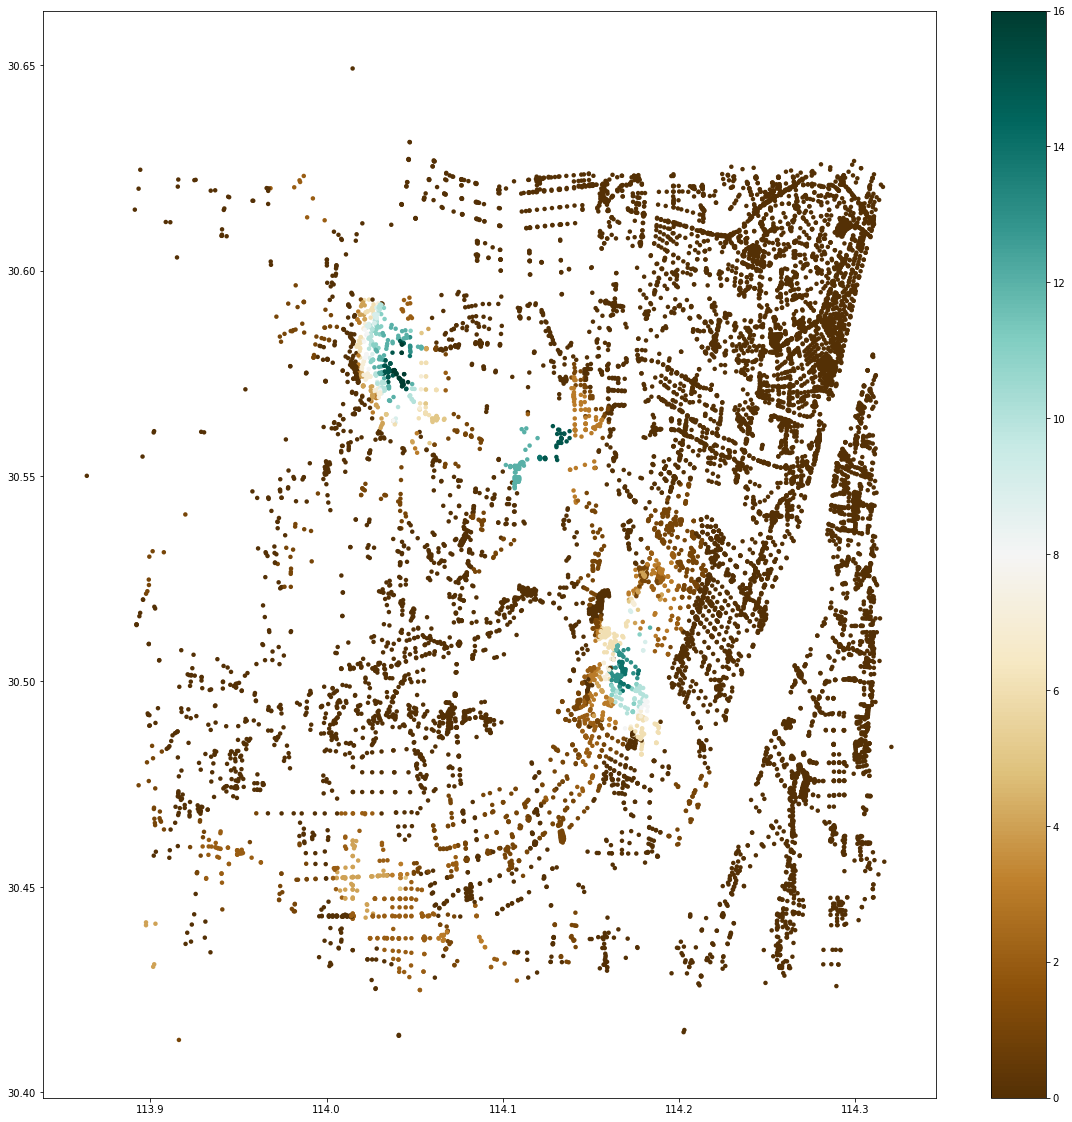

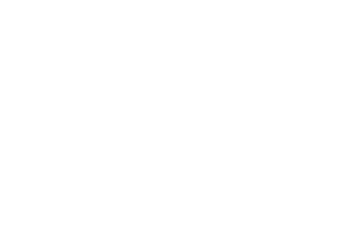

"\ncmap,热力图颜色\n\n在pandana中，不再接收bmap_kwargs\n\nplot_kwargs——用于控制颜色\n\n'epsg': '4326'——指的是WGS48坐标\n\n"

In [77]:
s = network.aggregate(2000, type="count", decay="linear") #聚合操作，比如计算1000m内的人口
"""
type = "count" 就是计数
decay = "linear" 即使线性
"""
fig_kwargs = {'figsize': [20, 20]}  #设置图形的大小
plot_kwargs = {'cmap': 'BrBG','s': 20,'edgecolor': 'none'}

sf_bbox = [30.43,113.8932,30.6231,114.3107]

fig,ax =network.plot(s, bbox=sf_bbox, 
         fig_kwargs=fig_kwargs, plot_kwargs=plot_kwargs,plot_type='scatter',
                     cbar_kwargs=None)
ax.set_facecolor('k')
plt.axis("off")
plt.show()

"""
cmap,热力图颜色

在pandana中，不再接收bmap_kwargs

plot_kwargs——用于控制颜色

'epsg': '4326'——指的是WGS48坐标

"""

In [80]:
import h5py
import numpy as np

In [81]:
f = h5py.File('./jingkaiqu_net_low.h5','r')   #打开h5文件
# 可以查看所有的主键
for key in f.keys():
    print(f[key].name)
#     print(f[key].shape)
#     print(f[key].value)

/edges
/impedance_names
/nodes
/two_way


In [82]:
edges =pd.read_hdf('./jingkaiqu_net_low.h5','edges')   #读取边
print(edges)
"""
from 列中对应的是一个节点id
to 中对应的也是一个节点id
distance中是一个权重（距离）
"""

                             from          to    distance
286076008  3822581307   286076008  3822581307    9.419657
           9440486696   286076008  9440486696   10.108185
286076143  1882284071   286076143  1882284071   18.331649
           1926866245   286076143  1926866245  140.758848
286076166  1881981628   286076166  1881981628   12.137602
...                           ...         ...         ...
9520829248 9520829249  9520829248  9520829249   11.580569
9520829255 9520829257  9520829255  9520829257   11.008041
9520829257 9520829239  9520829257  9520829239  348.356611
           9520829258  9520829257  9520829258    9.933718
9520829258 1218865115  9520829258  1218865115   11.011582

[21336 rows x 3 columns]


'\nfrom 列中对应的是一个节点id\nto 中对应的也是一个节点id\ndistance中是一个权重（距离）\n'

In [83]:

nodes =pd.read_hdf('./jingkaiqu_net_low.h5','nodes')   #读取节点
print(nodes) 

                     x          y
id                               
286076008   114.246416  30.611443
286076143   114.285625  30.595140
286076166   114.302132  30.598442
286085136   114.300235  30.594956
286085676   114.266004  30.599488
...                ...        ...
9520829248  114.289462  30.553067
9520829249  114.289360  30.553124
9520829255  114.291851  30.555675
9520829257  114.291946  30.555619
9520829258  114.292031  30.555569

[13566 rows x 2 columns]
